<div style="text-align:center; font-size:2.5em; color:#4B0055; letter-spacing:2px; background-color:#F5F5F5; padding:20px; border-radius:10px; width: 97%">
    Análise Exploratória de Dados: 
    <span style="color:#FFA726; font-weight:bold;">Fluxar</span>
    <div style="text-align:center; margin-top:10px;">
        <img src="logo_fluxar.png" alt="Logo Fluxar" style="height:70px;">
    </div>
</div>


<div style="background:#F7F3FF; border-left:8px solid #4B0055; padding:16px; margin-top:20px; width: 97%">
    <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">Dataset escolhido:</span><br>
    <span style="color:#FFA726; font-size:1.1em;">Inventory Analysis Case Study — <b>Fluxar</b></span>
</div>


<div style="background:linear-gradient(90deg, #ffc164ff 0%, #FF1493 100%); color:white; padding:18px; border-radius:10px; margin-top:20px;width: 97%">
    <span style="font-size:1.2em; font-weight:bold;">Objetivos da Análise Exploratória:</span>
    <ul style="margin-top:10px;">
        <li>Explorar a estrutura e qualidade dos dados de inventário.</li>
        <li>Identificar padrões de movimentação e níveis de estoque críticos.</li>
        <li>Detectar outliers, variações sazonais e possíveis gargalos operacionais.</li>
        <li>Gerar insights para otimização da gestão de estoque e melhoria operacional.</li>
    </ul>
</div>


<!-- Etapa 1 -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">1. Importação e Visualização Inicial</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Importar bibliotecas essenciais: pandas, numpy, matplotlib, seaborn e kagglehub.</li>
    <li>Carregar o dataset de inventário diretamente do KaggleHub.</li>
    <li>Visualizar as primeiras linhas para entender colunas, tipos de dados e valores gerais.</li>
  </ul>
</div>


Importando bibliotecas

In [5]:

# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import shutil
from matplotlib.patches import FancyBboxPatch
import re
from matplotlib.colors import LinearSegmentedColormap
import os 

Criando função de estilização de tabela

In [6]:
def estilizar_tabela(df, 
                     header_color='#FFA726', 
                     header_text_color='white', 
                     cell_padding='5px', 
                     text_align='left', 
                     font_size='12px'):
    """
    Aplica um estilo padronizado às tabelas pandas DataFrame para exibição bonita em notebooks.

    Parâmetros:
    - df: DataFrame -> Tabela a ser estilizada.
    - header_color: str -> Cor de fundo do cabeçalho.
    - header_text_color: str -> Cor do texto do cabeçalho.
    - cell_padding: str -> Espaçamento interno das células.
    - text_align: str -> Alinhamento do texto ('left', 'center', 'right').
    - font_size: str -> Tamanho da fonte.
    
    Retorno:
    - DataFrame estilizado pronto para exibição com display().
    """
    
    styled = (
        df.style.set_table_styles([
            {'selector': 'th',
             'props': [
                 ('background-color', header_color),
                 ('color', header_text_color),
                 ('font-weight', 'bold'),
                 ('text-align', 'center'),
                 ('font-size', font_size)
             ]},
            {'selector': 'td',
             'props': [
                 ('padding', cell_padding),
                 ('text-align', text_align),
                 ('font-size', font_size)
             ]}
        ])
    )
    
    return styled


Carregando dados

In [7]:
# Caminho final desejado
destino = r"C:\Users\mayumishimizu-ieg\OneDrive - Instituto Germinare\Área de Trabalho\2º ANO\Interdisciplinar\Analise Exploratoria"
destino_dataset = os.path.join(destino, "dataset_fluxar")
os.makedirs(destino_dataset, exist_ok=True)

# Baixar dataset do KaggleHub
dataset_id = "bhanupratapbiswas/inventory-analysis-case-study"

try:
    path = kagglehub.dataset_download(dataset_id)
    if os.path.exists(path):
        print("✅ | Dataset baixado em:", path)
    else:
        raise FileNotFoundError("Caminho do download não existe.")
except Exception as e:
    print("❌ | Erro ao baixar dataset:", e)
    path = None

# Copiar e renomear o primeiro CSV encontrado para "dataset_eda.csv"
if path:
    for file in os.listdir(path):
        full_file_path = os.path.join(path, file)
        if os.path.isfile(full_file_path) and file.endswith(".csv"):
            destino_final = os.path.join(destino_dataset, "dataset_eda.csv")
            try:
                shutil.copy(full_file_path, destino_final)
                print(f"✅ | Arquivo salvo e renomeado como: {destino_final}")
            except Exception as e:
                print("❌ | Erro ao copiar o arquivo:", e)
            break  # garante que só salva o primeiro CSV

✅ | Dataset baixado em: C:\Users\mayumishimizu-ieg\.cache\kagglehub\datasets\bhanupratapbiswas\inventory-analysis-case-study\versions\1
✅ | Arquivo salvo e renomeado como: C:\Users\mayumishimizu-ieg\OneDrive - Instituto Germinare\Área de Trabalho\2º ANO\Interdisciplinar\Analise Exploratoria\dataset_fluxar\dataset_eda.csv


In [8]:
# Carregar dataset com pandas
dataset_modelo_path = os.path.join(destino_dataset, "dataset_eda.csv")
inventory_df = pd.read_csv(dataset_modelo_path)

# Visualizar primeiras linhas com estilo padronizado
display(estilizar_tabela(inventory_df.head()))

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.990000,750mL,750,1,9.280000,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.990000,750mL,750,1,28.670000,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.990000,750mL,750,1,30.460000,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.990000,750mL,750,1,26.110000,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.990000,750mL,750,1,10.940000,7245,PROXIMO SPIRITS INC.


<!-- Colunas detalhadas -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width: 97%">
  <ul style="color:#4B0055; margin-top:10px;">
    <li><b>brand:</b> Código ou nome da marca do produto.</li>
    <li><b>description:</b> Descrição textual do produto.</li>
    <li><b>price:</b> Preço de venda do produto.</li>
    <li><b>size:</b> Tamanho do produto (ex.: 750mL, 1500mL).</li>
    <li><b>volume:</b> Volume em mililitros (numeric) — pode ser usado para análise de distribuição e estoque.</li>
    <li><b>classification:</b> Categoria do produto (ex.: 1 = premium, 2 = standard).</li>
    <li><b>purchaseprice:</b> Preço de aquisição ou custo do produto.</li>
    <li><b>vendornumber:</b> Código do fornecedor.</li>
    <li><b>vendorname:</b> Nome do fornecedor.</li>
  </ul>
</div>


<!-- Etapa 2 Principal -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">2. Limpeza e Pré-processamento Inicial</span>
  <p style="color:#4B0055; margin-top:10px;">
    Antes de analisar os dados, precisamos garantir que estejam consistentes e padronizados. Nesta etapa:
  </p>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Verificamos valores ausentes e tipos de dados de cada coluna.</li>
    <li>Corrigimos datas e tipos numéricos, garantindo que todas as colunas estejam no formato correto.</li>
    <li>Normalizamos os nomes das colunas para facilitar a análise e a programação.</li>
    <li>Objetivo: preparar o dataset para a análise exploratória, evitando erros e inconsistências.</li>
  </ul>
</div>


<!-- Etapa 2a -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">2a. Verificação de Valores Ausentes e Tipos de Dados</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Identificar colunas com valores ausentes.</li>
    <li>Conferir tipos de dados de cada coluna.</li>
    <li>Objetivo: detectar inconsistências antes de iniciar a análise exploratória.</li>
  </ul>
</div>


In [9]:
# Verificar tipos de dados
display(estilizar_tabela(
    inventory_df.dtypes.to_frame().rename(columns={0: 'Tipo de Dado'})
))

# Contar valores ausentes
missing_df = inventory_df.isna().sum().to_frame().rename(columns={0: 'Valores Ausentes'})
display(estilizar_tabela(missing_df))

,Tipo de Dado
Brand,int64
Description,object
Price,float64
Size,object
Volume,object
Classification,int64
PurchasePrice,float64
VendorNumber,int64
VendorName,object


,Valores Ausentes
Brand,0
Description,1
Price,0
Size,1
Volume,1
Classification,0
PurchasePrice,0
VendorNumber,0
VendorName,0


<!-- Etapa 2b -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">2b. Limpeza e Correção de Tipos</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Converter colunas de datas para <code>datetime</code> (se existirem).</li>
    <li>Garantir que colunas numéricas estejam no tipo correto (int/float).</li>
    <li>Objetivo: padronizar os dados para facilitar análises estatísticas e visuais.</li>
  </ul>
</div>


In [10]:
# Exemplo genérico de conversão de datas
for col in inventory_df.columns:
    if 'date' in col.lower():
        inventory_df[col] = pd.to_datetime(inventory_df[col], errors='coerce')
        
# Converter colunas numéricas
numeric_cols = inventory_df.select_dtypes(include=['int64', 'float64']).columns
inventory_df[numeric_cols] = inventory_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Visualizar resumo após limpeza
display(estilizar_tabela(inventory_df.head()))

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.990000,750mL,750,1,9.280000,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.990000,750mL,750,1,28.670000,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.990000,750mL,750,1,30.460000,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.990000,750mL,750,1,26.110000,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.990000,750mL,750,1,10.940000,7245,PROXIMO SPIRITS INC.


<!-- Etapa 2c -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">2c. Normalização de Nomes de Colunas</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Padronizar nomes: minúsculas, sem espaços e caracteres especiais.</li>
    <li>Facilitar chamadas de colunas no código e visualizações.</li>
  </ul>
</div>


In [11]:
# Normalizar nomes de colunas
inventory_df.columns = [col.strip().lower().replace(' ', '_').replace('-', '_') for col in inventory_df.columns]

# Conferir resultado
display(estilizar_tabela(pd.DataFrame(inventory_df.columns, columns=['Colunas Normalizadas'])))

,Colunas Normalizadas
0,brand
1,description
2,price
3,size
4,volume
5,classification
6,purchaseprice
7,vendornumber
8,vendorname


In [12]:
# Verificando inconsistência nos dados de size
inventory_df['size'].unique()

array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
       '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
       '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
       '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
       '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
       '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
       '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk', nan,
       '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
       '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
       '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
      dtype=object)

In [13]:
# Função para limpar e formatar size
def clean_size_format(value):
    if pd.isna(value) or 'Unknown' in str(value):
        return None
    match = re.search(r'(\d+(\.\d+)?)\s*[mM][lL]', str(value))
    if match:
        return f"{float(match.group(1))} mL"
    return None

# Sobrescreve a coluna size com os valores limpos e formatados
inventory_df['size'] = inventory_df['size'].apply(clean_size_format)

# Verificar resultado
inventory_df['size'].unique()

array(['750.0 mL', '1000.0 mL', '1750.0 mL', '50.0 mL', '375.0 mL',
       '100.0 mL', '200.0 mL', '300.0 mL', None, '250.0 mL', '1500.0 mL',
       '3000.0 mL', '5000.0 mL', '4000.0 mL', '187.0 mL', '150.0 mL',
       '500.0 mL', '720.0 mL', '650.0 mL', '330.0 mL', '18000.0 mL',
       '180.0 mL', '6000.0 mL', '20.0 mL', '20000.0 mL', '162.5 mL',
       '400.0 mL', '1100.0 mL', '600.0 mL', '19500.0 mL', '560.0 mL',
       '3750.0 mL', '9000.0 mL'], dtype=object)

<!-- Etapa 3 Principal -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">3. Análise Descritiva e Exploratória</span>
  <p style="color:#4B0055; margin-top:10px;">
    Nesta etapa, exploramos o dataset para entender melhor a operação de estoque:
  </p>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Distribuição de produtos por marca, categoria e volume.</li>
    <li>Resumo estatístico das colunas numéricas (preço, custo, quantidade).</li>
    <li>Análise de valores ausentes e potenciais inconsistências.</li>
    <li>Visualizações gráficas iniciais: histogramas, boxplots e contagens por categoria.</li>
  </ul>
</div>


In [14]:
display(estilizar_tabela(inventory_df.describe()))

,brand,price,classification,purchaseprice,vendornumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


<!-- Etapa 3a -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">3a. Estatísticas Descritivas das Colunas Numéricas</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Calcular média, mediana, mínimo, máximo e desvio padrão.</li>
    <li>Visualizar distribuição para identificar outliers ou valores discrepantes.</li>
  </ul>
</div>


In [15]:
# Estatísticas descritivas
numeric_cols = ['price', 'purchaseprice']  # ajustar se houver outras colunas numéricas
display(estilizar_tabela(inventory_df[numeric_cols].describe()))

,price,purchaseprice
count,12261.000000,12261.000000
mean,38.640240,26.488220
std,206.151172,156.182948
min,0.000000,0.000000
25%,10.990000,6.890000
50%,15.990000,10.650000
75%,29.990000,20.130000
max,13999.900000,11111.030000


<!-- Etapa 3b -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">3b. Contagem de Categorias e Marcas</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Quantos produtos existem por marca e por categoria.</li>
    <li>Identificar possíveis concentrações ou marcas/categorias com poucos produtos.</li>
  </ul>
</div>


In [16]:
# Criando função de tabela de contagem estilizada com padrão Fluxar
def display_top_counts(df, column, top_n=5):
    """
    Exibe as contagens dos valores únicos de uma coluna com estilo, mostrando apenas os top_n.
    """
    top_counts = df[column].value_counts().to_frame().head(top_n)
    display(estilizar_tabela(top_counts))

In [17]:
# Contagem por marca
display_top_counts(inventory_df, 'brand')

# Contagem por classificação/categoria
display_top_counts(inventory_df, 'classification')

,count
brand,
46964,1
58,1
62,1
63,1
72,1


,count
classification,
2,8693
1,3568


<!-- Etapa 3c -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.2em; color:#4B0055; font-weight:bold;">3c. Distribuição de Volume e Tamanho</span>
  <ul style="color:#4B0055; margin-top:12px;">
    <li>Analisar a distribuição dos produtos por volume e tamanho.</li>
    <li>Detectar inconsistências ou valores atípicos.</li>
  </ul>
</div>


In [18]:
# Distribuição de volume
display_top_counts(inventory_df,'volume')

# Distribuição de tamanho
display_top_counts(inventory_df,'size')



,count
volume,
750,9840
1500,497
1750,433
1000,428
375,323


,count
size,
750.0 mL,9840
1500.0 mL,497
1750.0 mL,433
1000.0 mL,428
375.0 mL,323


<!-- Etapa 4 -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">4. Visualizações Gráficas</span>
  <p style="color:#4B0055; margin-top:10px;">
    Nesta etapa, exploramos os dados visualmente para identificar padrões, dispersões e outliers nas principais variáveis.
  </p>
</div>


<!-- 4a - Histogramas -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width: 97%">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">4a. Histogramas de Preço e Custo</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Visualiza a distribuição de <b>price</b> e <b>purchaseprice</b>.</li>
    <li>Permite identificar valores mais frequentes e possíveis outliers.</li>
  </ul>
</div>


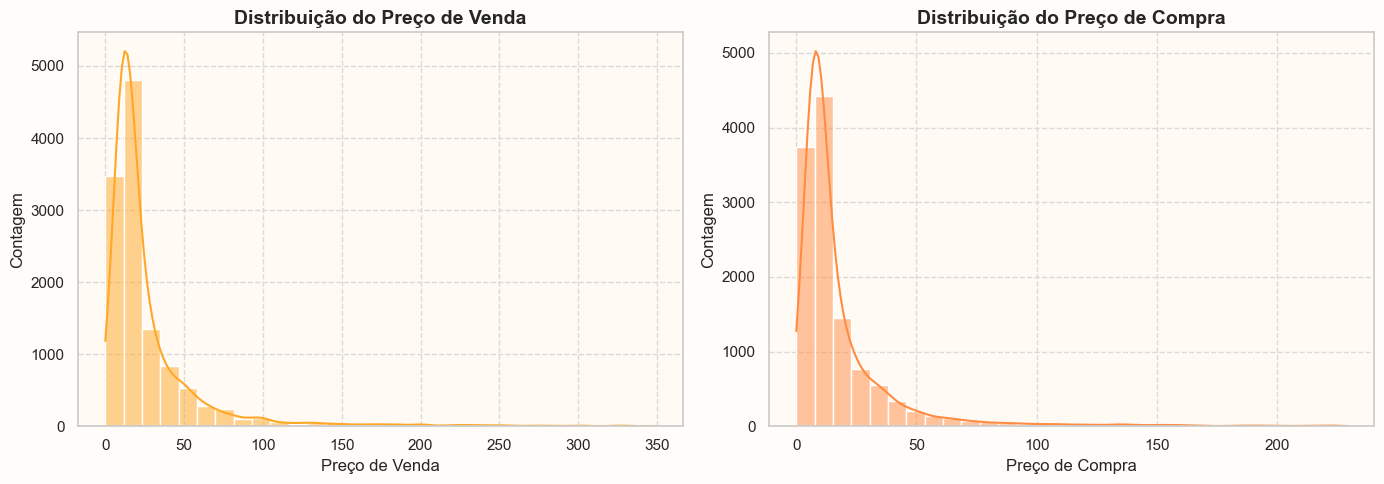

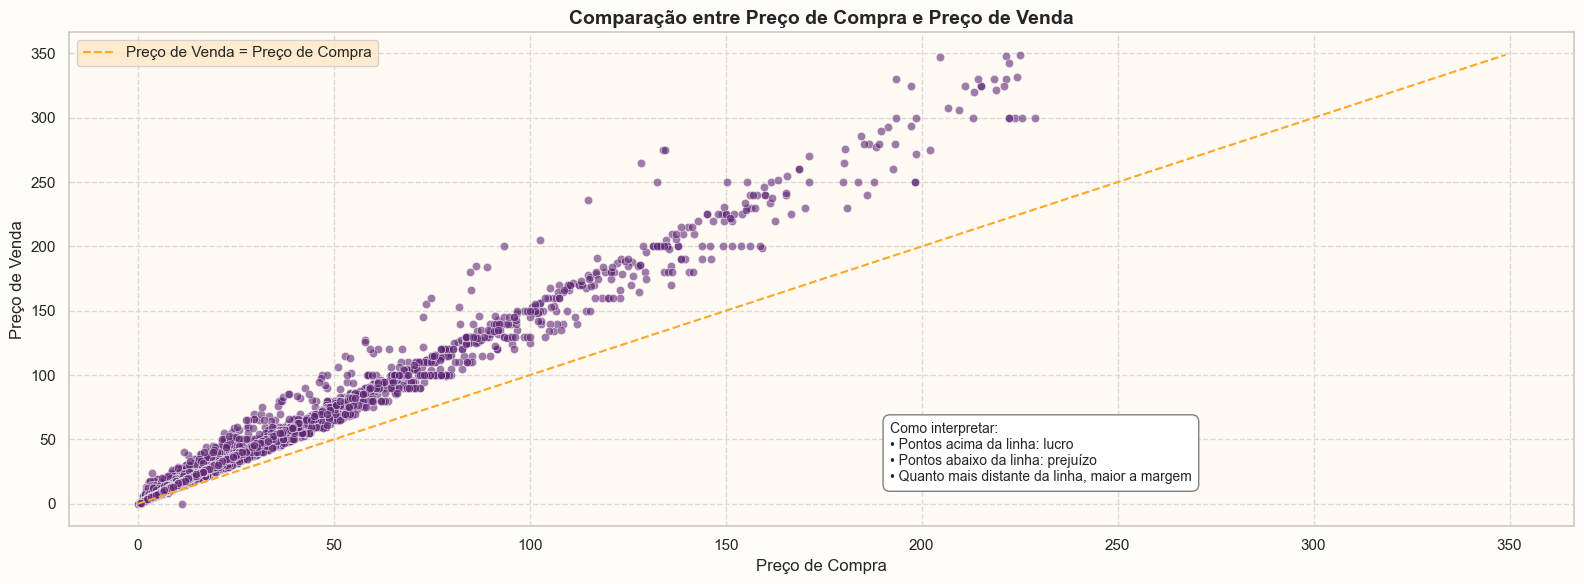

In [19]:
# ------------------------------------------------------------------------------
# 1. Pré-processamento dos dados

# Remover registros com valores nulos nas colunas relevantes
df = inventory_df.dropna(subset=['price', 'purchaseprice'])

# Remover outliers extremos (acima do percentil 99)
df = df[
    (df['price'] < df['price'].quantile(0.99)) &
    (df['purchaseprice'] < df['purchaseprice'].quantile(0.99))
]

# ------------------------------------------------------------------------------
# 2. Configuração do estilo global dos gráficos

# Tema limpo com grid discreto
sns.set_theme(style="whitegrid")

# Configurações globais de título e labels
plt.rcParams.update({
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.titleweight": "bold",
    "axes.facecolor": (1.0, 0.91, 0.78, 0.1),  # laranja bem claro, levemente transparente
    "figure.facecolor": (1.0, 0.91, 0.78, 0.1), # fundo padrão da figura
    "grid.color": "#DADADA",  # grid suave
    "grid.linestyle": "--"
})

# ------------------------------------------------------------------------------
# 3. Distribuição dos preços (Venda e Compra)

plt.figure(figsize=(14, 5))

# Histograma: Preço de Venda
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True, color='#FFA726')
plt.title('Distribuição do Preço de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Contagem')

# Histograma: Preço de Compra
plt.subplot(1, 2, 2)
sns.histplot(df['purchaseprice'], bins=30, kde=True, color='#FF8C42')
plt.title('Distribuição do Preço de Compra')
plt.xlabel('Preço de Compra')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# 4. Relação entre Preço de Compra e Preço de Venda

plt.figure(figsize=(16, 6))

# Gráfico de dispersão
sns.scatterplot(
    data=df, x='purchaseprice', y='price',
    color="#5F2675", alpha=0.6
)

# Linha de referência (venda = compra)
max_val = max(df['price'].max(), df['purchaseprice'].max())
plt.plot(
    [0, max_val], [0, max_val],
    color='#FFA726', linestyle='--', label='Preço de Venda = Preço de Compra'
)

# Caixa de explicação lateral
plt.text(
    max_val * 0.55, max_val * 0.05,
    "Como interpretar:\n"
    "• Pontos acima da linha: lucro\n"
    "• Pontos abaixo da linha: prejuízo\n"
    "• Quanto mais distante da linha, maior a margem",
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Títulos e rótulos
plt.title('Comparação entre Preço de Compra e Preço de Venda')
plt.xlabel('Preço de Compra')
plt.ylabel('Preço de Venda')
plt.legend()
plt.tight_layout()
plt.show()

<!-- 4b - Boxplots -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width: 97%">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">4b. Boxplots de Preço, Custo e Volume</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Permite identificar outliers em <b>price</b>, <b>purchaseprice</b> e <b>volume</b>.</li>
    <li>Auxilia na decisão de limpeza ou transformação de dados para modelagem futura.</li>
  </ul>
</div>


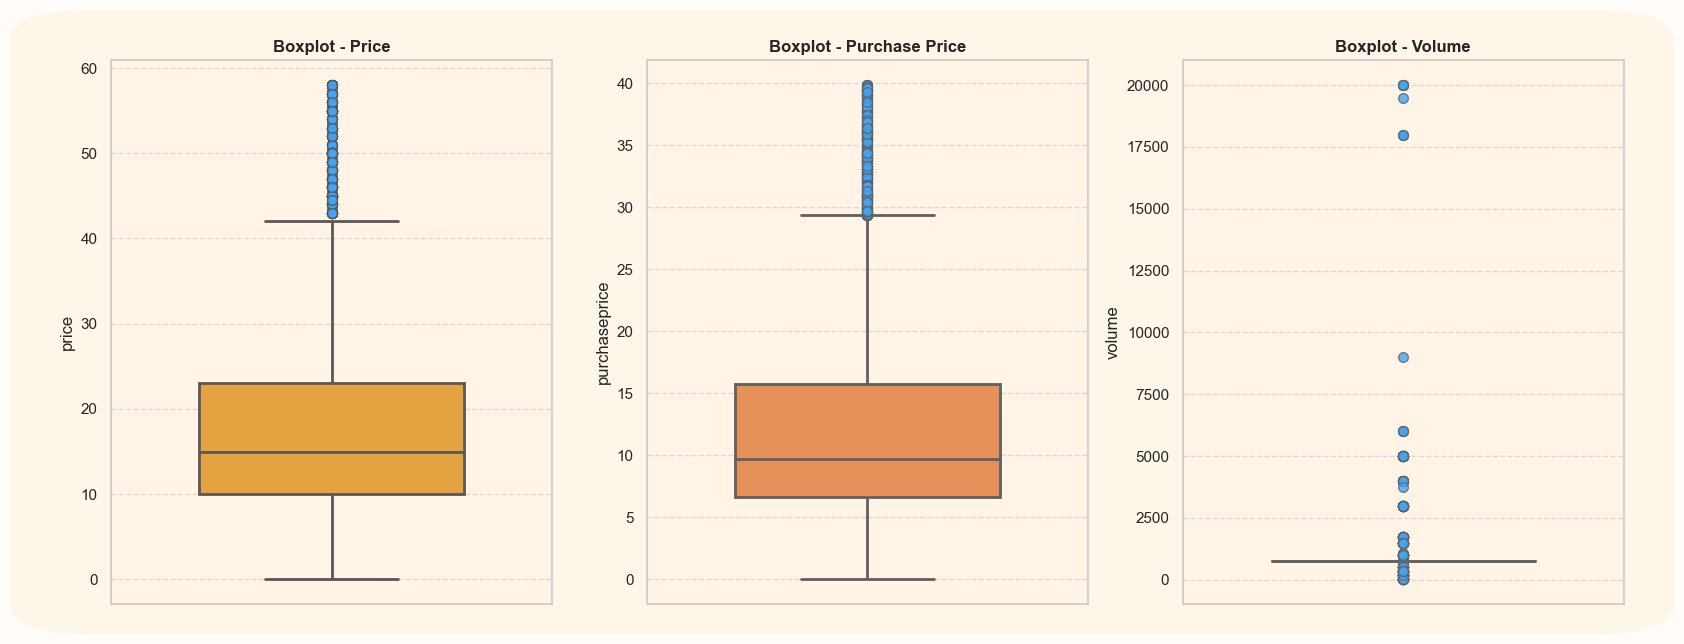

In [ ]:
# Garantir que volume seja numérico
inventory_df['volume'] = pd.to_numeric(inventory_df['volume'], errors='coerce')

# Função para remover outliers usando IQR
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return series[(series >= Q1 - 1.5*IQR) & (series <= Q3 + 1.5*IQR)]

# Filtrar outliers para price e purchaseprice
price_filtered = remove_outliers(inventory_df['price'])
purchaseprice_filtered = remove_outliers(inventory_df['purchaseprice'])
# Volume permanece completo
volume_full = inventory_df['volume']

# Paleta Fluxar
fluxar_palette = ['#FFA726', '#FF8C42', '#FFB74D']

# Configuração dos outliers (bolinhas)
flierprops = dict(marker='o', markerfacecolor='#42A5F5', markersize=7, linestyle='none', alpha=0.8)

# Criar figura e eixos
fig, axes = plt.subplots(1,3,figsize=(16,6))

# Fundo arredondado e transparente
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0,0.91,0.78,0.3), 
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

# Boxplot preço - tirando outliers
sns.boxplot(y=price_filtered, color=fluxar_palette[0], width=0.6, linewidth=2, flierprops=flierprops, ax=axes[0])
axes[0].set_title('Boxplot - Price', fontsize=12)

# Boxplot custo - tirando outliers
sns.boxplot(y=purchaseprice_filtered, color=fluxar_palette[1], width=0.6, linewidth=2, flierprops=flierprops, ax=axes[1])
axes[1].set_title('Boxplot - Purchase Price',   size=12)

# Boxplot volume (com todos os dados)
sns.boxplot(y=volume_full, color=fluxar_palette[2], width=0.6, linewidth=2, flierprops=flierprops, ax=axes[2])
axes[2].set_title('Boxplot - Volume', fontsize=12)

plt.tight_layout()
plt.show()


<!-- 4c - Gráficos de barras -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width: 97%">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">4c. Gráficos de Barras</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Visualiza a distribuição de <b>classification</b>, <b>size</b> e <b>volume</b>.</li>
    <li>Permite identificar concentrações e proporções em categorias-chave.</li>
  </ul>
</div>


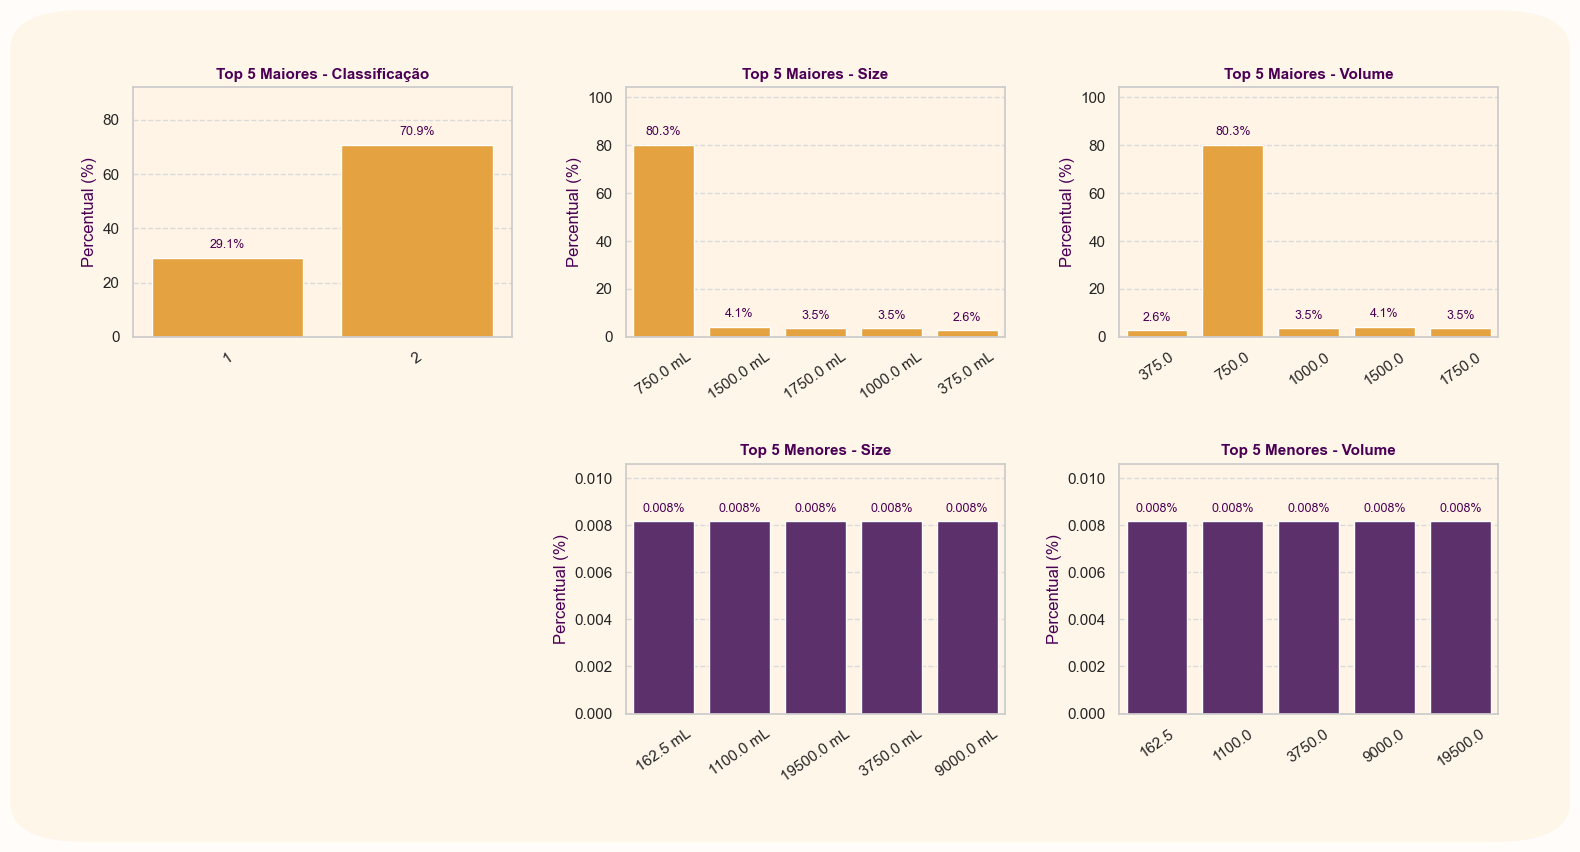

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

TOP_PALETTE = 'Oranges_r'
BOTTOM_PALETTE = 'Purples'

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Fundo arredondado e transparente para toda a figura
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0,0.91,0.78,0.3),  # laranja claro com transparência
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

def plot_bar(df, column, title, ax, top=True, decimals=1):
    counts = df[column].value_counts(normalize=True) * 100

    # Top ou bottom 5
    if top:
        subset = counts.head(5)
    else:
        subset = counts.tail(5)
        if len(subset) < 3:
            ax.axis('off')
            return

    # Reset index para plotar
    plot_data = subset.reset_index()
    plot_data.columns = [column, 'percent']

    # Corrige warning: usa palette + legend=False
    bars = sns.barplot(
        x=column, y='percent', data=plot_data,
        color='#FFA726' if top else '#5F2675',  # substitui palette
        ax=ax
    )


    ax.set_title(title, fontsize=11, weight='bold', color='#4B0055')
    ax.set_ylabel('Percentual (%)', color='#4B0055')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=35)

    ymax = plot_data['percent'].max()
    ax.set_ylim(0, ymax * 1.3)

    # Coloca os valores em cima das barras de forma correta
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + ymax*0.05,
            f"{height:.{decimals}f}%",
            ha='center',
            fontsize=9,
            color='#4B0055'
        )

# Linha 1 – Top 5
plot_bar(inventory_df, 'classification', 'Top 5 Maiores - Classificação', axes[0,0], top=True)
plot_bar(inventory_df, 'size', 'Top 5 Maiores - Size', axes[0,1], top=True)
plot_bar(inventory_df, 'volume', 'Top 5 Maiores - Volume', axes[0,2], top=True)

# Linha 2 – Bottom 5
plot_bar(inventory_df, 'classification', 'Top 5 Menores - Classificação', axes[1,0], top=False)
plot_bar(inventory_df, 'size', 'Top 5 Menores - Size', axes[1,1], top=False, decimals=3)
plot_bar(inventory_df, 'volume', 'Top 5 Menores - Volume', axes[1,2], top=False, decimals=3)

plt.tight_layout(pad=2.5)
plt.show()


In [22]:
inventory_df['size'].unique()


array(['750.0 mL', '1000.0 mL', '1750.0 mL', '50.0 mL', '375.0 mL',
       '100.0 mL', '200.0 mL', '300.0 mL', None, '250.0 mL', '1500.0 mL',
       '3000.0 mL', '5000.0 mL', '4000.0 mL', '187.0 mL', '150.0 mL',
       '500.0 mL', '720.0 mL', '650.0 mL', '330.0 mL', '18000.0 mL',
       '180.0 mL', '6000.0 mL', '20.0 mL', '20000.0 mL', '162.5 mL',
       '400.0 mL', '1100.0 mL', '600.0 mL', '19500.0 mL', '560.0 mL',
       '3750.0 mL', '9000.0 mL'], dtype=object)

<!-- Etapa 5 -->
<div style="background:#F7F3FF; border-left:8px solid #A55EFF; padding:18px; border-radius:10px; margin-top:24px; width:97%;">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">5. Análise de Correlações</span>
  <p style="color:#4B0055; margin-top:10px;">
    Nesta etapa, exploramos a relação entre variáveis numéricas para identificar padrões e dependências que possam impactar a gestão de estoque, como vendas, estoque e lead time.
  </p>
</div>

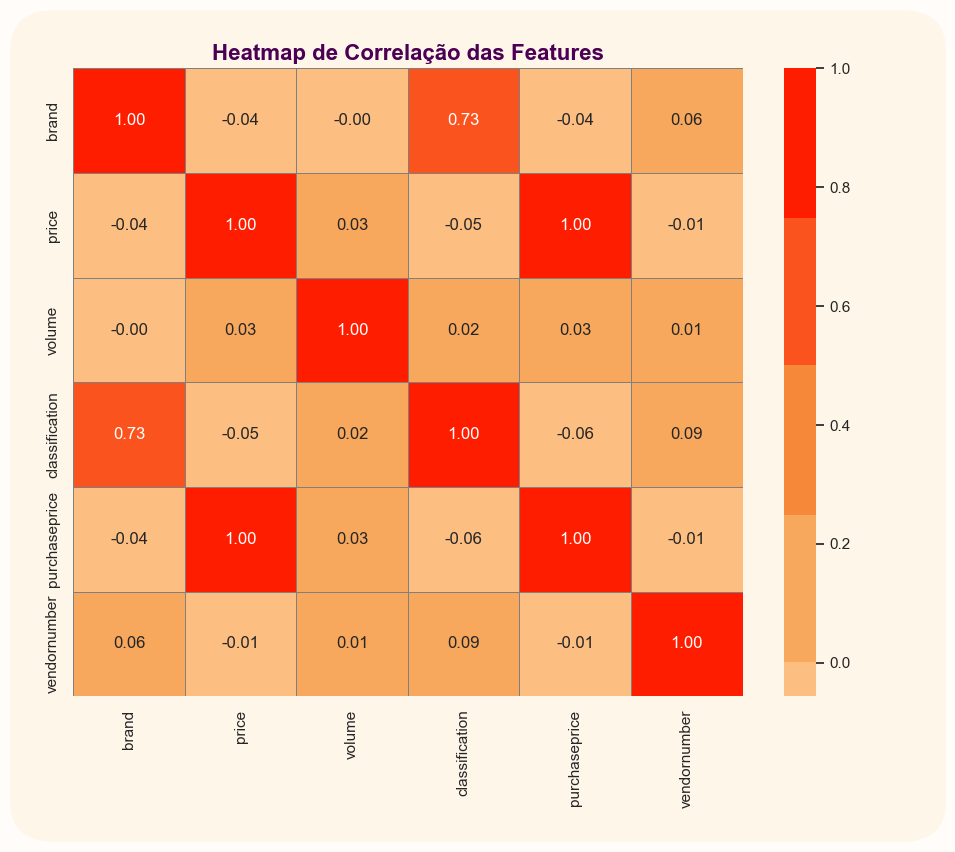

In [23]:
# Selecionar todas as colunas numéricas
numeric_cols = inventory_df.select_dtypes(include=np.number)

# Calcular correlação
corr = numeric_cols.corr()

# Paleta Fluxar
fluxar_colors = ["#FFE7CE", "#FFCC99", "#F59A44", "#FF1D00"]
cmap = LinearSegmentedColormap.from_list("fluxar_colors", fluxar_colors, N=8)

# Criar figura
plt.figure(figsize=(9,8))
fig = plt.gcf()  # pega a figura atual

# Fundo arredondado e transparente
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0, 0.91, 0.78, 0.3),  # laranja claro com transparência
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

# Plotar heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    center=0, 
    linewidths=0.5, 
    linecolor='gray'
)

plt.title('Heatmap de Correlação das Features', fontsize=16, weight='bold', color='#4B0055')
plt.tight_layout()
plt.show()


<!-- Interpretação da Correlação -->
<div style="background:#f4e3ff; border-left:8px solid #A55EFF; padding:18px; border-radius:10px; margin-top:12px; width:97%;">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">Interpretação da Correlação entre Preço de Compra e Venda</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>A forte correlação positiva entre <b>purchaseprice</b> e <b>price</b> indica que os preços de venda seguem diretamente os custos de aquisição.</li>
    <li>Isso ocorre porque as empresas geralmente aplicam uma <b>margem fixa de lucro</b> sobre o preço de compra, ajustando o preço de venda proporcionalmente.</li>
    <li>Essa relação linear sugere uma <b>política de precificação consistente</b> e previsível, com poucas variações fora do padrão.</li>
    <li>Pontos fora da tendência podem representar <b>promoções, descontos excessivos</b> ou <b>erros de registro</b>.</li>
  </ul>
</div>


<!-- Etapa 6 -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width: 97%">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">6. Análise de Stockouts e Criticidade</span>
  <p style="color:#4B0055; margin-top:10px;">
    Nesta etapa, identificamos produtos com risco operacional devido a estoque baixo ou zerado, avaliando a frequência de stockouts por SKU ou categoria.
  </p>
</div>

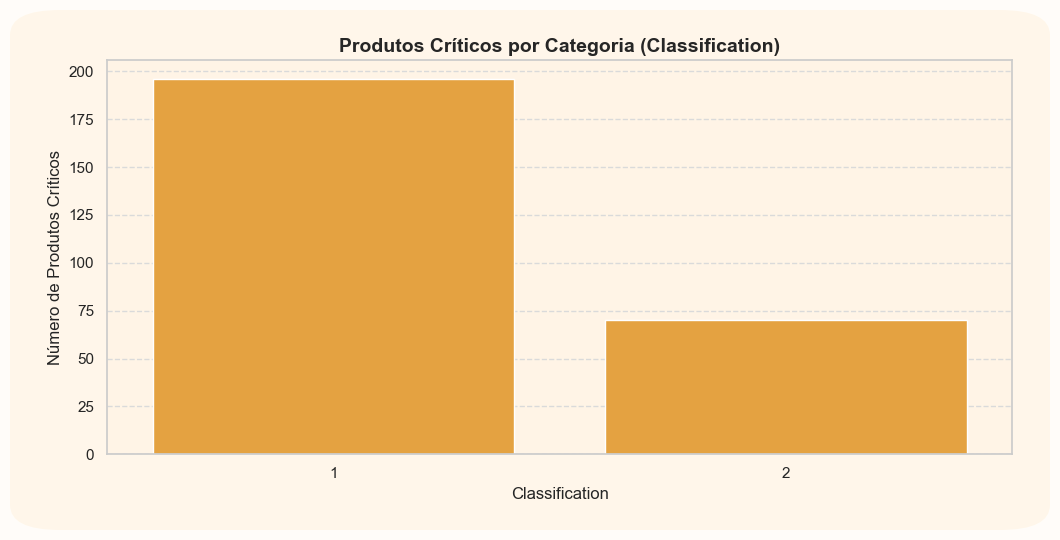

In [24]:
from matplotlib.patches import FancyBboxPatch

# Consideramos produtos críticos: purchaseprice muito baixo ou muito alto (1% e 99% quantis)
low_price_threshold = inventory_df['purchaseprice'].quantile(0.01)
high_price_threshold = inventory_df['purchaseprice'].quantile(0.99)

critical_products = inventory_df[
    (inventory_df['purchaseprice'] <= low_price_threshold) | 
    (inventory_df['purchaseprice'] >= high_price_threshold)
]

# Contagem de produtos críticos por classification
critical_count = critical_products['classification'].value_counts()

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10,5))

# Retângulo arredondado atrás do gráfico (fundo laranja claro e transparente)
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0,0.91,0.78,0.3),  # laranja claro com transparência
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

# Gráfico de barras
sns.barplot(
    x=critical_count.index, 
    y=critical_count.values, 
    color='#FFA726',
    ax=ax
)
ax.set_title('Produtos Críticos por Categoria (Classification)')
ax.set_xlabel('Classification')
ax.set_ylabel('Número de Produtos Críticos')

plt.tight_layout()
plt.show()


<!-- Etapa 7 -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width:97%;">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">7. Agrupamentos e Insights Operacionais</span>
  <p style="color:#4B0055; margin-top:10px;">
    Agrupamos os dados por armazém, categoria e SKU para extrair insights operacionais, como estoque médio, produtos mais vendidos e menos disponíveis.
  </p>
</div>

<!-- 7a - Preço Médio por Fornecedor -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width:97%;">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">7a. Preço Médio por Fornecedor</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Mostra os fornecedores com maior preço médio de venda.</li>
    <li>Auxilia na análise de fornecedores mais caros e possíveis oportunidades de negociação.</li>
    <li>Visualização das top 10 fornecedores mais caros para decisões estratégicas.</li>
  </ul>
</div>


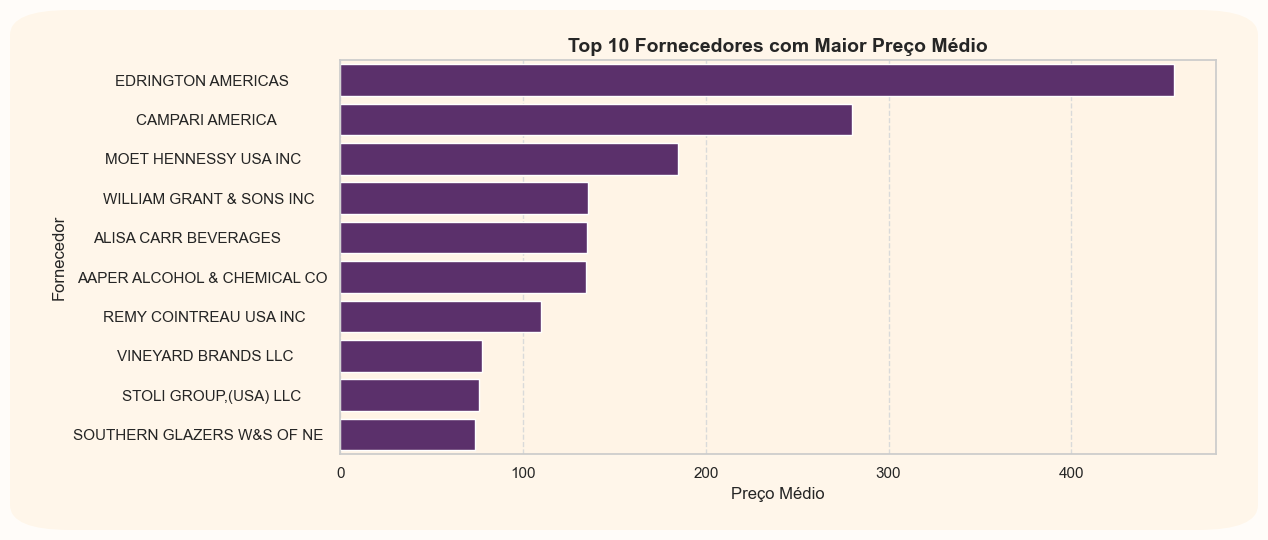

In [26]:
from matplotlib.patches import FancyBboxPatch

# 7b - Preço Médio por Fornecedor
avg_price_vendor = inventory_df.groupby('vendorname')['price'].mean().sort_values(ascending=False).head(10)

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(12,5))

# Retângulo arredondado atrás do gráfico (fundo laranja claro e transparente)
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0,0.91,0.78,0.3),  # laranja claro com transparência
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

# Gráfico de barras
sns.barplot(
    x=avg_price_vendor.values, 
    y=avg_price_vendor.index, 
    color='#5F2675',
    ax=ax
)
ax.set_title('Top 10 Fornecedores com Maior Preço Médio')
ax.set_xlabel('Preço Médio')
ax.set_ylabel('Fornecedor')

plt.tight_layout()
plt.show()


<!-- 7c - Faixa de Preço por Categoria -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width:97%;">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">7b. Faixa de Preço por Categoria</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Visualiza a distribuição de preço por categoria (<b>classification</b>).</li>
    <li>Identifica dispersão de preços, outliers e diferenças entre categorias.</li>
    <li>Auxilia em decisões de precificação e análise de margens.</li>
  </ul>
</div>


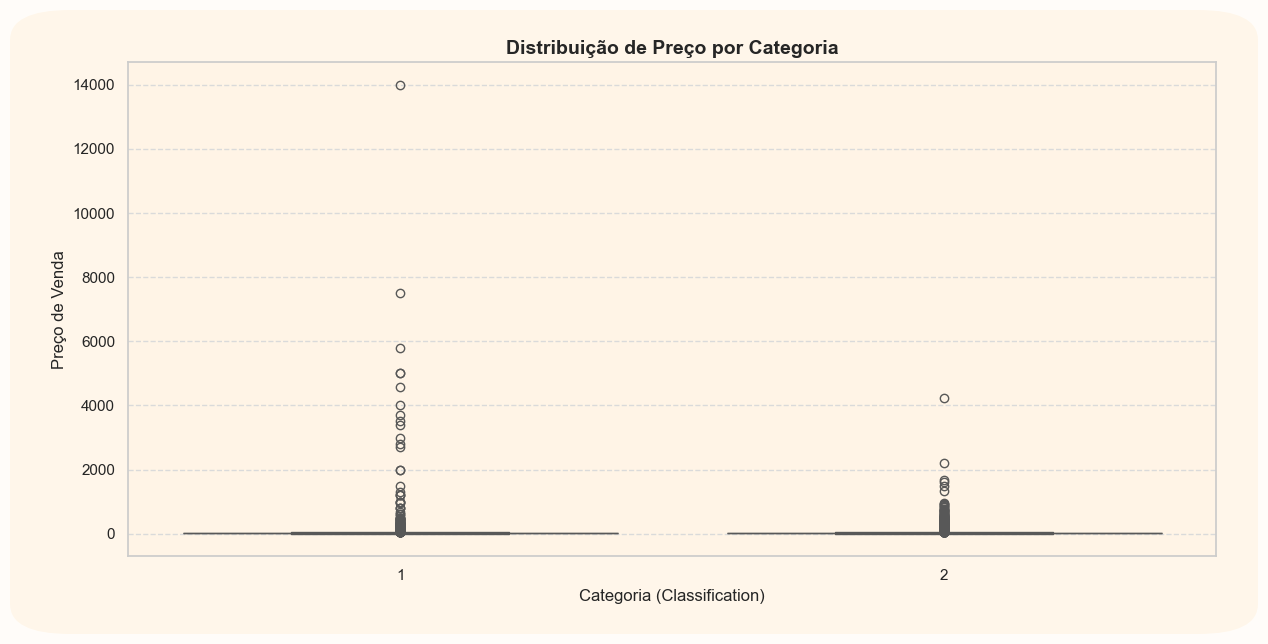

In [27]:
# 7c - Faixa de Preço por Categoria (Boxplot)
fig, ax = plt.subplots(figsize=(12,6))

# Retângulo arredondado atrás do gráfico (fundo laranja claro e transparente)
bbox = FancyBboxPatch(
    (0,0), 1,1,
    boxstyle="round,pad=0.02,rounding_size=0.05",
    transform=fig.transFigure,
    facecolor=(1.0,0.91,0.78,0.3),  # laranja claro com transparência
    edgecolor="none",
    zorder=-1
)
fig.patches.append(bbox)

# Boxplot
sns.boxplot(
    x='classification', 
    y='price', 
    data=inventory_df, 
    hue='classification',
    palette=['#FF8C42','#FFA726'],
    dodge=False,
    ax=ax
)
ax.set_title('Distribuição de Preço por Categoria')
ax.set_xlabel('Categoria (Classification)')
ax.set_ylabel('Preço de Venda')

# Remove legenda duplicada
ax.get_legend().remove()

plt.tight_layout()
plt.show()


<!-- Etapa 8 -->
<div style="background:#F7F3FF; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:24px; width:97%;">
  <span style="font-size:1.3em; color:#4B0055; font-weight:bold;">8. Conclusões do EDA</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>Resumo das descobertas e insights obtidos a partir da exploração de dados.</li>
    <li>Permite identificar padrões, outliers, produtos críticos e oportunidades de otimização.</li>
    <li>Base para decisões de negócio, planejamento de estoque e precificação.</li>
  </ul>
</div>


<!-- Resultados e Insights do EDA -->
<div style="background:#ffe8c6ff; border-left:8px solid #FFA726; padding:18px; border-radius:10px; margin-top:12px; width: 97%">
  <span style="font-size:1.1em; font-weight:bold; color:#4B0055;">Principais Conclusões</span>
  <ul style="color:#4B0055; margin-top:10px;">
    <li>A maior parte dos produtos pertence à categoria <strong>2</strong>, mas ambas as categorias possuem produtos críticos que precisam de atenção.</li>
    <li>Preços de venda e preços de compra apresentam distribuição assimétrica, com outliers de alto valor, que podem distorcer médias.</li>
    <li>Produtos com <strong>purchaseprice muito baixo ou muito alto</strong> foram identificados como críticos, podendo gerar risco de stockout ou margem negativa.</li>
    <li>Correlação positiva entre preço de compra e preço de venda sugere consistência na precificação, mas existem produtos com margem muito baixa ou negativa.</li>
    <li>Tamanhos (size) e volumes possuem grande variação e inconsistências nos dados originais, sendo importante padronização para análise e visualização.</li>
    <li>Top 10 marcas e fornecedores com maior preço médio foram identificados, permitindo priorizar negociação ou revisão de portfólio.</li>
  </ul>
</div>
